In [1]:
import pandas as pd
df = pd.read_csv('track.csv')
df

,Unnamed: 0,id,time,geometry,Throttle Position.value,Throttle Position.unit,CO2.value,CO2.unit,GPS VDOP.value,GPS VDOP.unit,...,track.length,track.begin,track.end,sensor.type,sensor.engineDisplacement,sensor.model,sensor.id,sensor.fuelType,sensor.constructionYear,sensor.manufacturer
0,0,5eb7582165b80c5d6be69f24,2020-05-09T21:10:46,POINT (7.651804248986446 51.95395646644701),16.000000,%,6.060965,kg/h,1.000000,precision,...,3.411275,2020-05-09T21:10:46Z,2020-05-09T21:19:46Z,car,1798,Caliber,58395f40e4b0a979d45bd61b,gasoline,2007,Dodge
1,1,5eb7582165b80c5d6be69f26,2020-05-09T21:10:51,POINT (7.651688214188641 51.953948811047),16.831018,%,7.644530,kg/h,1.000000,precision,...,3.411275,2020-05-09T21:10:46Z,2020-05-09T21:19:46Z,car,1798,Caliber,58395f40e4b0a979d45bd61b,gasoline,2007,Dodge
2,2,5eb7582165b80c5d6be69f27,2020-05-09T21:10:56,POINT (7.651482504244623 51.95395440112109),16.846021,%,6.152178,kg/h,1.000000,precision,...,3.411275,2020-05-09T21:10:46Z,2020-05-09T21:19:46Z,car,1798,Caliber,58395f40e4b0a979d45bd61b,gasoline,2007,Dodge
3,3,5eb7582165b80c5d6be69f28,2020-05-09T21:11:01,POINT (7.651269219953312 51.95396783757189),17.000001,%,7.380207,kg/h,0.930191,precision,...,3.411275,2020-05-09T21:10:46Z,2020-05-09T21:19:46Z,car,1798,Caliber,58395f40e4b0a979d45bd61b,gasoline,2007,Dodge
4,4,5eb7582165b80c5d6be69f29,2020-05-09T21:11:06,POINT (7.651009479108991 51.9539617740475),15.151858,%,3.983817,kg/h,1.000000,precision,...,3.411275,2020-05-09T21:10:46Z,2020-05-09T21:19:46Z,car,1798,Caliber,58395f40e4b0a979d45bd61b,gasoline,2007,Dodge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,5eb7582165b80c5d6be69f8c,2020-05-09T21:19:25,POINT (7.629810985321127 51.97380579836828),18.000000,%,9.711037,kg/h,0.800000,precision,...,3.411275,2020-05-09T21:10:46Z,2020-05-09T21:19:46Z,car,1798,Caliber,58395f40e4b0a979d45bd61b,gasoline,2007,Dodge
104,104,5eb7582165b80c5d6be69f8d,2020-05-09T21:19:30,POINT (7.629810757935047 51.97380424942821),15.000000,%,4.298640,kg/h,0.800000,precision,...,3.411275,2020-05-09T21:10:46Z,2020-05-09T21:19:46Z,car,1798,Caliber,58395f40e4b0a979d45bd61b,gasoline,2007,Dodge
105,105,5eb7582165b80c5d6be69f8e,2020-05-09T21:19:35,POINT (7.629810757935047 51.97380424942821),15.000000,%,4.481128,kg/h,0.893056,precision,...,3.411275,2020-05-09T21:10:46Z,2020-05-09T21:19:46Z,car,1798,Caliber,58395f40e4b0a979d45bd61b,gasoline,2007,Dodge
106,106,5eb7582165b80c5d6be69f8f,2020-05-09T21:19:40,POINT (7.629819861245102 51.97380808862147),15.000000,%,5.077956,kg/h,1.000000,precision,...,3.411275,2020-05-09T21:10:46Z,2020-05-09T21:19:46Z,car,1798,Caliber,58395f40e4b0a979d45bd61b,gasoline,2007,Dodge


In [2]:
import osmnx as ox
import networkx as nx
import pandas as pd

# import osmnx as ox
# import networkx as nx


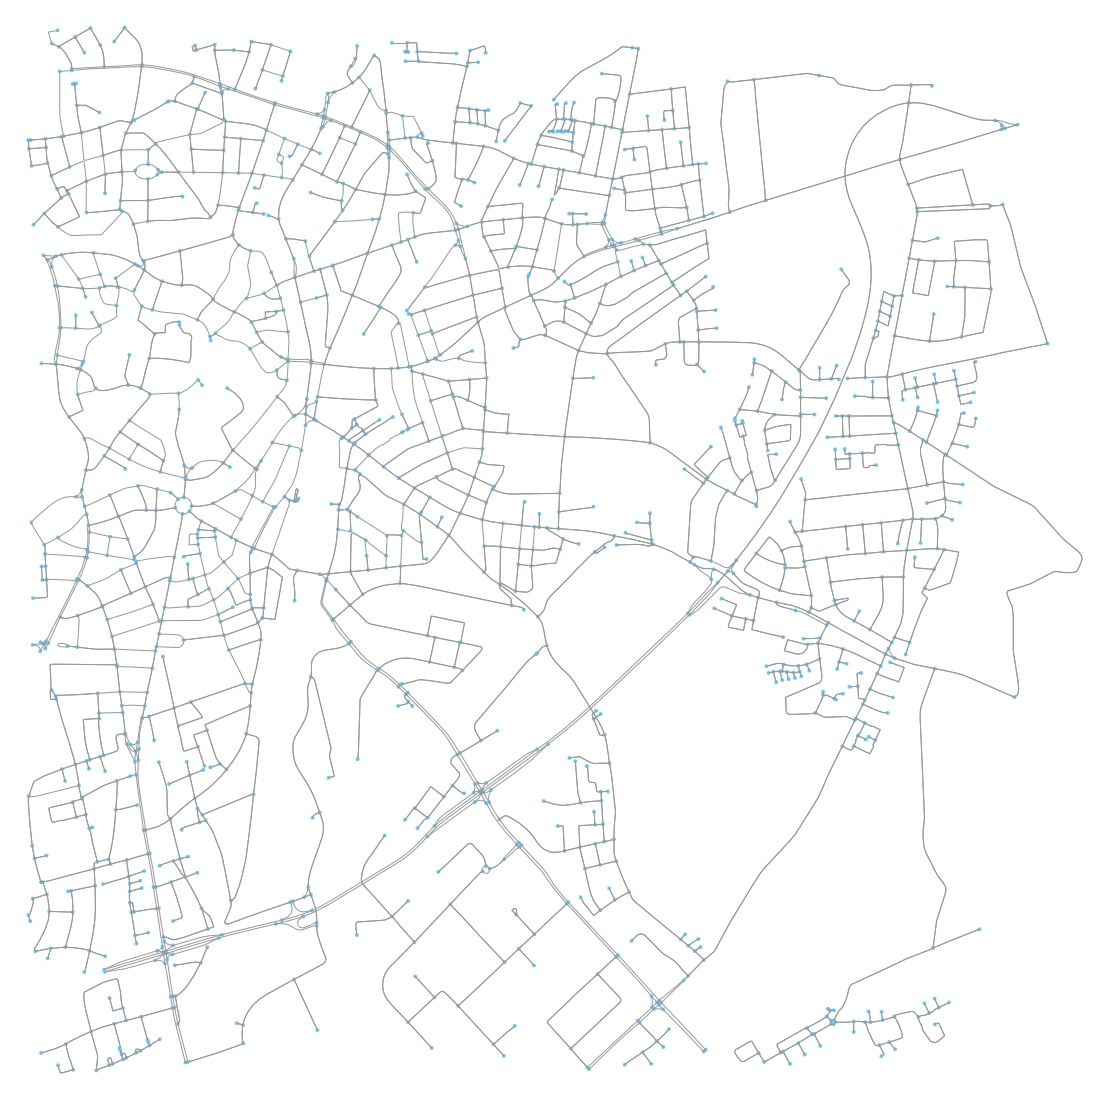

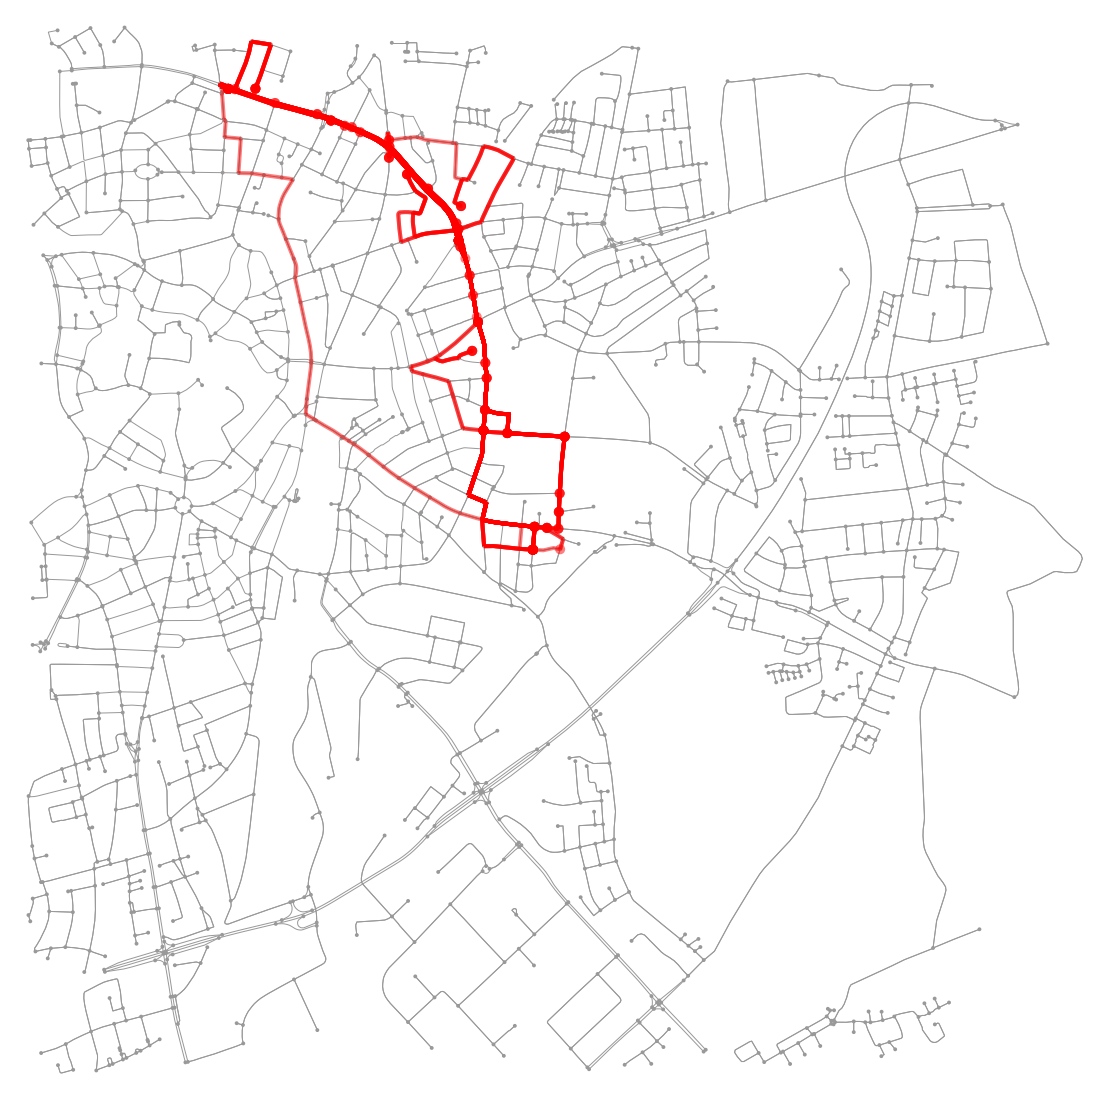

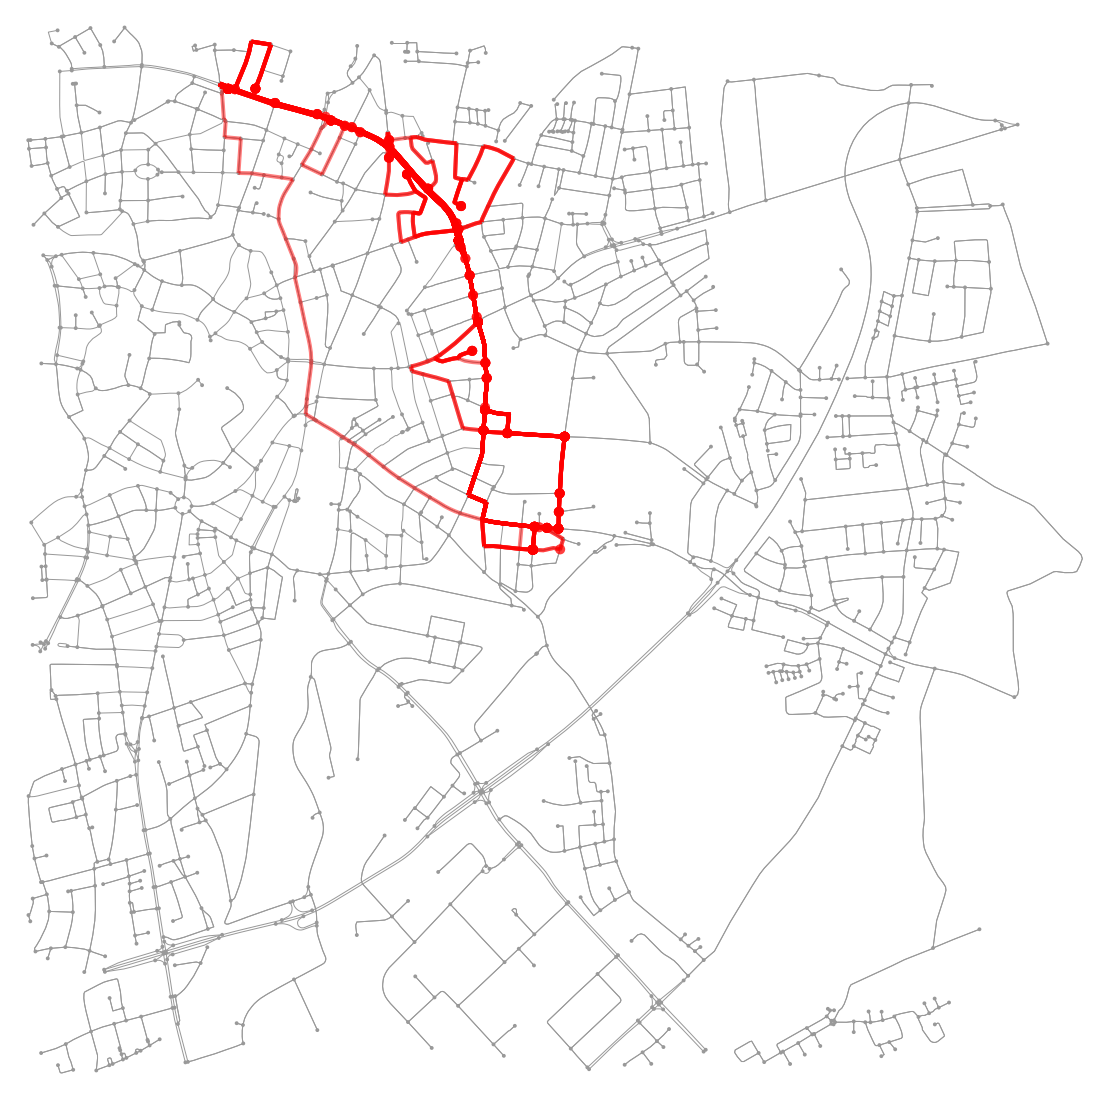

In [3]:
import numpy as np
geom_list = []
node_list = []
for i in df['geometry']:
    geom = {}
    geom['long'] = float(i.split()[1].split('(')[1])
    geom['lat'] =  float(i.split()[2].split(')')[0])
    geom_list.append(geom)
point = (geom_list[0]['lat'],geom_list[0]['long'])
graph = ox.graph_from_point(point, distance=2500, network_type='drive')
ox.plot_graph(graph,fig_height=20, fig_width=20)
for i in geom_list:
    node = ox.get_nearest_node(graph,(i['lat'],i['long']))
    node_list.append(node)
route_list = []
try:
    df.insert(len(df.columns), 'nodes', 'nodes')
except Exception:
    print("error")

try:
    for i in range(len(node_list)):
        route = nx.shortest_path(graph, 
                                 np.random.choice(node_list), 
                                 np.random.choice(node_list),
                                 weight='length')
        route_list.append(route)
    ox.plot_graph_routes(graph,route_list, fig_height=20, fig_width=20)
except (KeyError, NetworkXNoPath):
    print("error")
    
x=0
y=1
try:
    for i in range(len(node_list)-1):
        route = nx.shortest_path(graph, 
                                 node_list[x], 
                                 node_list[y],
                                 weight='length')
        route_list.append(route)
        x += 1
        y += 1
    ox.plot_graph_routes(graph,route_list, fig_height=20, fig_width=20)
except (KeyError, IndexError):
    print("error")



In [4]:
df['nodes'] = node_list
df

,Unnamed: 0,id,time,geometry,Throttle Position.value,Throttle Position.unit,CO2.value,CO2.unit,GPS VDOP.value,GPS VDOP.unit,...,track.begin,track.end,sensor.type,sensor.engineDisplacement,sensor.model,sensor.id,sensor.fuelType,sensor.constructionYear,sensor.manufacturer,nodes
0,0,5eb7582165b80c5d6be69f24,2020-05-09T21:10:46,POINT (7.651804248986446 51.95395646644701),16.000000,%,6.060965,kg/h,1.000000,precision,...,2020-05-09T21:10:46Z,2020-05-09T21:19:46Z,car,1798,Caliber,58395f40e4b0a979d45bd61b,gasoline,2007,Dodge,244517237
1,1,5eb7582165b80c5d6be69f26,2020-05-09T21:10:51,POINT (7.651688214188641 51.953948811047),16.831018,%,7.644530,kg/h,1.000000,precision,...,2020-05-09T21:10:46Z,2020-05-09T21:19:46Z,car,1798,Caliber,58395f40e4b0a979d45bd61b,gasoline,2007,Dodge,262571338
2,2,5eb7582165b80c5d6be69f27,2020-05-09T21:10:56,POINT (7.651482504244623 51.95395440112109),16.846021,%,6.152178,kg/h,1.000000,precision,...,2020-05-09T21:10:46Z,2020-05-09T21:19:46Z,car,1798,Caliber,58395f40e4b0a979d45bd61b,gasoline,2007,Dodge,262571338
3,3,5eb7582165b80c5d6be69f28,2020-05-09T21:11:01,POINT (7.651269219953312 51.95396783757189),17.000001,%,7.380207,kg/h,0.930191,precision,...,2020-05-09T21:10:46Z,2020-05-09T21:19:46Z,car,1798,Caliber,58395f40e4b0a979d45bd61b,gasoline,2007,Dodge,262571338
4,4,5eb7582165b80c5d6be69f29,2020-05-09T21:11:06,POINT (7.651009479108991 51.9539617740475),15.151858,%,3.983817,kg/h,1.000000,precision,...,2020-05-09T21:10:46Z,2020-05-09T21:19:46Z,car,1798,Caliber,58395f40e4b0a979d45bd61b,gasoline,2007,Dodge,262571338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,5eb7582165b80c5d6be69f8c,2020-05-09T21:19:25,POINT (7.629810985321127 51.97380579836828),18.000000,%,9.711037,kg/h,0.800000,precision,...,2020-05-09T21:10:46Z,2020-05-09T21:19:46Z,car,1798,Caliber,58395f40e4b0a979d45bd61b,gasoline,2007,Dodge,4332992177
104,104,5eb7582165b80c5d6be69f8d,2020-05-09T21:19:30,POINT (7.629810757935047 51.97380424942821),15.000000,%,4.298640,kg/h,0.800000,precision,...,2020-05-09T21:10:46Z,2020-05-09T21:19:46Z,car,1798,Caliber,58395f40e4b0a979d45bd61b,gasoline,2007,Dodge,4332992177
105,105,5eb7582165b80c5d6be69f8e,2020-05-09T21:19:35,POINT (7.629810757935047 51.97380424942821),15.000000,%,4.481128,kg/h,0.893056,precision,...,2020-05-09T21:10:46Z,2020-05-09T21:19:46Z,car,1798,Caliber,58395f40e4b0a979d45bd61b,gasoline,2007,Dodge,4332992177
106,106,5eb7582165b80c5d6be69f8f,2020-05-09T21:19:40,POINT (7.629819861245102 51.97380808862147),15.000000,%,5.077956,kg/h,1.000000,precision,...,2020-05-09T21:10:46Z,2020-05-09T21:19:46Z,car,1798,Caliber,58395f40e4b0a979d45bd61b,gasoline,2007,Dodge,4332992177


In [5]:
df.columns
outside = df['nodes']
inside = df['nodes']
dual_index = list(zip(outside, inside))
dual_index = pd.MultiIndex.from_tuples(dual_index) 
dual_index

MultiIndex([( 244517237,  244517237),
            ( 262571338,  262571338),
            ( 262571338,  262571338),
            ( 262571338,  262571338),
            ( 262571338,  262571338),
            ( 262571338,  262571338),
            ( 262571338,  262571338),
            ( 262571338,  262571338),
            ( 262571338,  262571338),
            (  53200192,   53200192),
            ...
            (  52180179,   52180179),
            (4332992177, 4332992177),
            (4332992177, 4332992177),
            (4332992177, 4332992177),
            (4332992177, 4332992177),
            (4332992177, 4332992177),
            (4332992177, 4332992177),
            (4332992177, 4332992177),
            (4332992177, 4332992177),
            (4332992177, 4332992177)],
           length=108)

In [6]:
df.index = dual_index
df

Unnamed: 0                        id  \
244517237  244517237            0  5eb7582165b80c5d6be69f24   
262571338  262571338            1  5eb7582165b80c5d6be69f26   
           262571338            2  5eb7582165b80c5d6be69f27   
           262571338            3  5eb7582165b80c5d6be69f28   
           262571338            4  5eb7582165b80c5d6be69f29   
...                           ...                       ...   
4332992177 4332992177         103  5eb7582165b80c5d6be69f8c   
           4332992177         104  5eb7582165b80c5d6be69f8d   
           4332992177         105  5eb7582165b80c5d6be69f8e   
           4332992177         106  5eb7582165b80c5d6be69f8f   
           4332992177         107  5eb7582165b80c5d6be69f90   

                                      time  \
244517237  244517237   2020-05-09T21:10:46   
262571338  262571338   2020-05-09T21:10:51   
           262571338   2020-05-09T21:10:56   
           262571338   2020-05-09T21:11:01   
           262571338   2020-05-09T21:11:06   
...                                    ...   
4332992177 4332992177  2020-05-09T21:19:25   
           4332992177  2020-05-09T21:19:30   
           4332992177  2020-05-09T21:19:35   
           4332992177  2020-05-09T21:19:40   
           4332992177  2020-05-09T21:19:46   

                                                          geometry  \
244517237  244517237   POINT (7.651804248986446 51.95395646644701)   
262571338  262571338     POINT (7.651688214188641 51.953948811047)   
           262571338   POINT (7.651482504244623 51.95395440112109)   
           262571338   POINT (7.651269219953312 51.95396783757189)   
           262571338    POINT (7.651009479108991 51.9539617740475)   
...                                                            ...   
4332992177 4332992177  POINT (7.629810985321127 51.97380579836828)   
           4332992177  POINT (7.629810757935047 51.97380424942821)   
           4332992177  POINT (7.629810757935047 51.97380424942821)   
           4332992177  POINT (7.629819861245102 51.97380808862147)   
           4332992177  POINT (7.629820371602108 51.97380924082935)   

                       Throttle Position.value Throttle Position.unit  \
244517237  244517237                 16.000000                      %   
262571338  262571338                 16.831018                      %   
           262571338                 16.846021                      %   
           262571338                 17.000001                      %   
           262571338                 15.151858                      %   
...                                        ...                    ...   
4332992177 4332992177                18.000000                      %   
           4332992177                15.000000                      %   
           4332992177                15.000000                      %   
           4332992177                15.000000                      %   
           4332992177                      NaN                    NaN   

                       CO2.value CO2.unit  GPS VDOP.value GPS VDOP.unit  ...  \
244517237  244517237    6.060965     kg/h        1.000000     precision  ...   
262571338  262571338    7.644530     kg/h        1.000000     precision  ...   
           262571338    6.152178     kg/h        1.000000     precision  ...   
           262571338    7.380207     kg/h        0.930191     precision  ...   
           262571338    3.983817     kg/h        1.000000     precision  ...   
...                          ...      ...             ...           ...  ...   
4332992177 4332992177   9.711037     kg/h        0.800000     precision  ...   
           4332992177   4.298640     kg/h        0.800000     precision  ...   
           4332992177   4.481128     kg/h        0.893056     precision  ...   
           4332992177   5.077956     kg/h        1.000000     precision  ...   
           4332992177        NaN      NaN        0.800000     precision  ...   

                                tr

In [7]:
node_unique = df['nodes'].unique()
node_unique[1]

262571338

In [8]:
# Example for separating the node to node cars
# sample for cars travelled between first node and second node
# df.loc[df.index.get_level_values(0)[1]]
avg_speed_list = []
x=0
y=1
for i in range(len(node_unique)-1):
    speed_df = df.loc[[node_unique[x],node_unique[y]]]
    mean = speed_df['GPS Speed.value'].mean()
    try:
        df.insert(len(df.columns), 'avg_speed', 'speed')
    except Exception:
        pass

    for i in range(len(speed_df)):
        avg_speed_list.append(mean)
    x += 1
    y += 1
avg_speed_list

# test_drive = df.loc[[244517237,262571338]]
# test_drive.columns
# total_values = test_drive['GPS Speed.value']
# total_values.mean()

[8.941385666666669,
 8.941385666666669,
 8.941385666666669,
 8.941385666666669,
 8.941385666666669,
 8.941385666666669,
 8.941385666666669,
 8.941385666666669,
 8.941385666666669,
 8.626491076923077,
 8.626491076923077,
 8.626491076923077,
 8.626491076923077,
 8.626491076923077,
 8.626491076923077,
 8.626491076923077,
 8.626491076923077,
 8.626491076923077,
 8.626491076923077,
 8.626491076923077,
 8.626491076923077,
 8.626491076923077,
 8.619085833333333,
 8.619085833333333,
 8.619085833333333,
 8.619085833333333,
 8.619085833333333,
 8.619085833333333,
 19.446280999999995,
 19.446280999999995,
 19.446280999999995,
 11.76092,
 11.76092,
 11.76092,
 11.76092,
 11.76092,
 11.76092,
 11.76092,
 11.76092,
 12.757109285714288,
 12.757109285714288,
 12.757109285714288,
 12.757109285714288,
 12.757109285714288,
 12.757109285714288,
 12.757109285714288,
 40.24872250000001,
 40.24872250000001,
 40.24872250000001,
 40.24872250000001,
 35.144678222222225,
 35.144678222222225,
 35.144678222222225,

In [9]:
for i in geom_list:
    print(i)

{'long': 7.651804248986446, 'lat': 51.95395646644701}
{'long': 7.651688214188641, 'lat': 51.953948811047}
{'long': 7.651482504244623, 'lat': 51.95395440112109}
{'long': 7.651269219953312, 'lat': 51.95396783757189}
{'long': 7.651009479108991, 'lat': 51.9539617740475}
{'long': 7.65085766595331, 'lat': 51.9539667659058}
{'long': 7.650798018613367, 'lat': 51.9539695101202}
{'long': 7.650789130372044, 'lat': 51.95406331299682}
{'long': 7.65082249062431, 'lat': 51.95424901747279}
{'long': 7.650863241833907, 'lat': 51.95445505537268}
{'long': 7.650928075192193, 'lat': 51.95467371589453}
{'long': 7.650947761313767, 'lat': 51.95477724315568}
{'long': 7.650944828213898, 'lat': 51.95477917552648}
{'long': 7.650950869932037, 'lat': 51.954819216651}
{'long': 7.651192830028558, 'lat': 51.95484402022239}
{'long': 7.651722194093042, 'lat': 51.95486221449412}
{'long': 7.652165220559899, 'lat': 51.95485605374532}
{'long': 7.652289732744734, 'lat': 51.9548470806214}
{'long': 7.652289090999456, 'lat': 51.

In [10]:
street_list =[]
import requests
for i in geom_list:
    
    #latlong from dataframe
    r,s = i['long'], i['lat']
    x = requests.get("http://router.project-osrm.org/nearest/v1/driving/{},{}?number=3&bearings=0,20".format(r,s))
    x = x.json()
    street_list.append(x['waypoints'][2]['name'])
    print(x['waypoints'][2]['name'])
print(street_list)
df

Bennostraße
Lambertistraße



Hubertistraße
Hubertistraße
Hubertistraße


Brunostraße
Brunostraße
Brunostraße
Brunostraße
Lambertistraße


Andreas-Hofer-Straße
Andreas-Hofer-Straße
Andreas-Hofer-Straße
Andreas-Hofer-Straße
Andreas-Hofer-Straße
Andreas-Hofer-Straße
Andreas-Hofer-Straße
Andreas-Hofer-Straße

Andreas-Hofer-Straße

Andreas-Hofer-Straße
Andreas-Hofer-Straße
Andreas-Hofer-Straße





Manfred-von-Richthofen-Straße
Hohenzollernring
Hohenzollernring
Hohenzollernring
Hohenzollernring
Hohenzollernring
Hohenzollernring
Hohenzollernring
Hohenzollernring
Hohenzollernring
Hohenzollernring
Hohenzollernring
Hohenzollernring
Hohenzollernring
Hohenzollernring
Hohenzollernring
Hohenzollernring
Hohenzollernring
Hohenzollernring
Hohenzollernring
Hohenzollernring
Kaiser-Wilhelm-Ring
Kaiser-Wilhelm-Ring
Kaiser-Wilhelm-Ring
Kaiser-Wilhelm-Ring
Kaiser-Wilhelm-Ring
Kaiser-Wilhelm-Ring
Kaiser-Wilhelm-Ring
Kaiser-Wilhelm-Ring
Kaiser-Wilhelm-Ring

Kaiser-Wilhelm-Ring
Kaiser-Wilhelm-Ring
Kaiser-Wilh

Unnamed: 0                        id  \
244517237  244517237            0  5eb7582165b80c5d6be69f24   
262571338  262571338            1  5eb7582165b80c5d6be69f26   
           262571338            2  5eb7582165b80c5d6be69f27   
           262571338            3  5eb7582165b80c5d6be69f28   
           262571338            4  5eb7582165b80c5d6be69f29   
...                           ...                       ...   
4332992177 4332992177         103  5eb7582165b80c5d6be69f8c   
           4332992177         104  5eb7582165b80c5d6be69f8d   
           4332992177         105  5eb7582165b80c5d6be69f8e   
           4332992177         106  5eb7582165b80c5d6be69f8f   
           4332992177         107  5eb7582165b80c5d6be69f90   

                                      time  \
244517237  244517237   2020-05-09T21:10:46   
262571338  262571338   2020-05-09T21:10:51   
           262571338   2020-05-09T21:10:56   
           262571338   2020-05-09T21:11:01   
           262571338   2020-05-09T21:11:06   
...                                    ...   
4332992177 4332992177  2020-05-09T21:19:25   
           4332992177  2020-05-09T21:19:30   
           4332992177  2020-05-09T21:19:35   
           4332992177  2020-05-09T21:19:40   
           4332992177  2020-05-09T21:19:46   

                                                          geometry  \
244517237  244517237   POINT (7.651804248986446 51.95395646644701)   
262571338  262571338     POINT (7.651688214188641 51.953948811047)   
           262571338   POINT (7.651482504244623 51.95395440112109)   
           262571338   POINT (7.651269219953312 51.95396783757189)   
           262571338    POINT (7.651009479108991 51.9539617740475)   
...                                                            ...   
4332992177 4332992177  POINT (7.629810985321127 51.97380579836828)   
           4332992177  POINT (7.629810757935047 51.97380424942821)   
           4332992177  POINT (7.629810757935047 51.97380424942821)   
           4332992177  POINT (7.629819861245102 51.97380808862147)   
           4332992177  POINT (7.629820371602108 51.97380924082935)   

                       Throttle Position.value Throttle Position.unit  \
244517237  244517237                 16.000000                      %   
262571338  262571338                 16.831018                      %   
           262571338                 16.846021                      %   
           262571338                 17.000001                      %   
           262571338                 15.151858                      %   
...                                        ...                    ...   
4332992177 4332992177                18.000000                      %   
           4332992177                15.000000                      %   
           4332992177                15.000000                      %   
           4332992177                15.000000                      %   
           4332992177                      NaN                    NaN   

                       CO2.value CO2.unit  GPS VDOP.value GPS VDOP.unit  ...  \
244517237  244517237    6.060965     kg/h        1.000000     precision  ...   
262571338  262571338    7.644530     kg/h        1.000000     precision  ...   
           262571338    6.152178     kg/h        1.000000     precision  ...   
           262571338    7.380207     kg/h        0.930191     precision  ...   
           262571338    3.983817     kg/h        1.000000     precision  ...   
...                          ...      ...             ...           ...  ...   
4332992177 4332992177   9.711037     kg/h        0.800000     precision  ...   
           4332992177   4.298640     kg/h        0.800000     precision  ...   
           4332992177   4.481128     kg/h        0.893056     precision  ...   
           4332992177   5.077956     kg/h        1.000000     precision  ...   
           4332992177        NaN      NaN        0.800000     precision  ...   

                                  

In [28]:
try:
    df.insert(len(df.columns), 'street_name', 'street')
except Exception:
    pass
df['street_name'] = street_list
df


id                 time  \
244517237  244517237   5eb7582165b80c5d6be69f24  2020-05-09T21:10:46   
262571338  262571338   5eb7582165b80c5d6be69f26  2020-05-09T21:10:51   
           262571338   5eb7582165b80c5d6be69f27  2020-05-09T21:10:56   
           262571338   5eb7582165b80c5d6be69f28  2020-05-09T21:11:01   
           262571338   5eb7582165b80c5d6be69f29  2020-05-09T21:11:06   
...                                         ...                  ...   
4332992177 4332992177  5eb7582165b80c5d6be69f8c  2020-05-09T21:19:25   
           4332992177  5eb7582165b80c5d6be69f8d  2020-05-09T21:19:30   
           4332992177  5eb7582165b80c5d6be69f8e  2020-05-09T21:19:35   
           4332992177  5eb7582165b80c5d6be69f8f  2020-05-09T21:19:40   
           4332992177  5eb7582165b80c5d6be69f90  2020-05-09T21:19:46   

                                                          geometry  \
244517237  244517237   POINT (7.651804248986446 51.95395646644701)   
262571338  262571338     POINT (7.651688214188641 51.953948811047)   
           262571338   POINT (7.651482504244623 51.95395440112109)   
           262571338   POINT (7.651269219953312 51.95396783757189)   
           262571338    POINT (7.651009479108991 51.9539617740475)   
...                                                            ...   
4332992177 4332992177  POINT (7.629810985321127 51.97380579836828)   
           4332992177  POINT (7.629810757935047 51.97380424942821)   
           4332992177  POINT (7.629810757935047 51.97380424942821)   
           4332992177  POINT (7.629819861245102 51.97380808862147)   
           4332992177  POINT (7.629820371602108 51.97380924082935)   

                       Throttle Position.value Throttle Position.unit  \
244517237  244517237                 16.000000                      %   
262571338  262571338                 16.831018                      %   
           262571338                 16.846021                      %   
           262571338                 17.000001                      %   
           262571338                 15.151858                      %   
...                                        ...                    ...   
4332992177 4332992177                18.000000                      %   
           4332992177                15.000000                      %   
           4332992177                15.000000                      %   
           4332992177                15.000000                      %   
           4332992177                      NaN                    NaN   

                       CO2.value CO2.unit  GPS VDOP.value GPS VDOP.unit  \
244517237  244517237    6.060965     kg/h        1.000000     precision   
262571338  262571338    7.644530     kg/h        1.000000     precision   
           262571338    6.152178     kg/h        1.000000     precision   
           262571338    7.380207     kg/h        0.930191     precision   
           262571338    3.983817     kg/h        1.000000     precision   
...                          ...      ...             ...           ...   
4332992177 4332992177   9.711037     kg/h        0.800000     precision   
           4332992177   4.298640     kg/h        0.800000     precision   
           4332992177   4.481128     kg/h        0.893056     precision   
           4332992177   5.077956     kg/h        1.000000     precision   
           4332992177        NaN      NaN        0.800000     precision   

                       GPS Bearing.value  ... sensor.type  \
244517237  244517237          244.006986  ...         car   
262571338  262571338          273.231882  ...         car   
           262571338          273.377388  ...         car   
           262571338          274.705621  ...         car   
           262571338          275.181028  ...         car   
...                                  ...  ...         ...   
4332992177 4332992177           0.000000  ...         car   
           4332992177           0.000000  ...         car   
           4